## Introduction to mathematical modelling of biological systems with Python
Dr. Anna Matuszyńska

<img src="https://www.python.org/static/community_logos/python-logo-master-v3-TM.png" alt="drawing" style="width: 200px;"/>

#### Teaching materials based on:
- [Programiz: How to Get Started With Python?](https://www.programiz.com/python-programming/first-program)
- [https://waterprogramming.wordpress.com/2018/02/12/plotting-trajectories-and-direction-fields-for-a-system-of-odes-in-python/](https://waterprogramming.wordpress.com/2018/02/12/plotting-trajectories-and-direction-fields-for-a-system-of-odes-in-python/)
- [SciPy Cookbook: LoktaVolterraTutorial](http://scipy-cookbook.readthedocs.io/items/LoktaVolterraTutorial.html)

Python is a **cross-platform, open source interpreted high-level programming language** for general-purpose programming. It was created by Dutch programmer Guido van Rossum and first released in 1991. Python is continuously developed by the community, but Guido with his **Benevolent Dictator For Life** (BDFL) title maintains the final say in the direction of development. 

The language's name is a tribute to the British comedy group Monty Python. To keep the comedy spirit it is an important goal of Python's developers to keep it fun to use. You will find numerous tutorials and reference materials where intead of using standard *foo* and *bar* you will be reffered to spam and eggs from the famous Monty Python sketch embedded below.

[![IMAGE ALT TEXT HERE](https://img.youtube.com/vi/anwy2MPT5RE/0.jpg)](https://youtu.be/anwy2MPT5RE)


Let's start with getting familiar with the key words. Make sure that you know how to use them

In [142]:
import keyword
keyword.kwlist

['False',
 'None',
 'True',
 'and',
 'as',
 'assert',
 'break',
 'class',
 'continue',
 'def',
 'del',
 'elif',
 'else',
 'except',
 'finally',
 'for',
 'from',
 'global',
 'if',
 'import',
 'in',
 'is',
 'lambda',
 'nonlocal',
 'not',
 'or',
 'pass',
 'raise',
 'return',
 'try',
 'while',
 'with',
 'yield']

Python has a design philosophy that emphasizes code readability and provides constructs that enable clear programming on both small and large scales. The language's core philosophy is summarised in the document The Zen of Python. Why not to start learning Python through it? Just import this.

In [143]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


<span style="color:red">Throughout this course we will try to keep those aphorisms in mind and programme in a beautiful, explicit and simple way.</span>.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
plt.interactive(True)

## The Fibonacci numbers
The Fibonacci numbers, also called the Fibonacci sequence, are characterised by the fact that every number after the first two is the sum of the two preceding ones:

$ \displaystyle \;0,\;1\;1,\;2,\;3,\;5,\;8,\;13,\;21,\;34,\;55,\;89,\;144,\;\ldots$

By definition, the first two numbers in the Fibonacci sequence are 0 and 1, and each subsequent number is the sum of the previous two.

The sequence $F_n$ of Fibonacci numbers is defined by the recurrence relation:

$F_{n}=F_{n-1}+F_{n-2},$

with seed values
$F_{0}=0,\;F_{1}=1.$

### Exercise 1
Explore the functions! Write your own function to calculate recursively the *n-th* Fibonacci number.

In [1]:
def rec_fib(n):
    '''recursive function returns the n-th number of the Fibonacci sequence'''
    if n > 1:
        return rec_fib(n-1) + rec_fib(n-2)
    return n

In [5]:
rec_fib(3)

2

### Exercise 2
Write a function to return the whole Fibonacci sequence (not just one number) to the *n-th* position.

In [9]:
def seq_fib(n):
    for i in range(n):
        print(rec_fib(i))

In [10]:
seq_fib(3)

0
1
1


# Ordinary Differential Equation (ODE)


## How the solver works
by Marvin van Aalst

The Euler method is a first-order numerical procedure for solving **ordinary differential equations** with a given initial value. It is the most basic explicit method for numerical integration of ODE, named after a swiss scientist Leonhard Euler. The Euler method is a first-order method, which means that the error per step (**local error**)is proportional to the square of the step size, and the error at a given time (**global error**) is proportional to the step size.

Given the initial starting point the Euler method estimates the value of a function
$$
\displaystyle y_{n+1}=y_{n}+hf(t_{n},y_{n})$$

where $h$ is is the step size.

In [6]:
def euler(x0,t,function):
    x = np.zeros(len(t))
    x[0] = x0
    for i in range(len(t)-1):
        x[i+1] = function(x[i]) * (t[i+1]-t[i]) + x[i]
    return x

Define simple function. E.g.,
$$
\dot x= 0.5x
$$

In [11]:
def lin_diff(x):    
    return 0.5*x

### Exercise
Plot the solution of the integration using Euler vs. original function

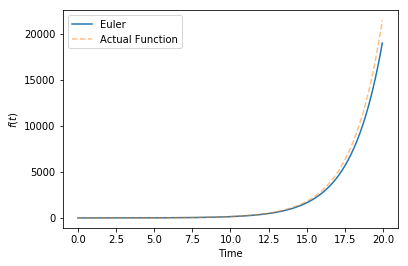

In [13]:
x0 = 1
plt.plot(t,euler(x0,t,lin_diff), alpha=1, label="Euler")
plt.plot(t,np.exp(lin_diff(t)), alpha=0.5, linestyle="dashed",label="Actual Function")
plt.xlabel("Time")
plt.ylabel("$f(t)$")
plt.legend()
plt.show()

Start with importing the standard library with integration methods, called ```scipy.integrate```.

In [ ]:
import scipy.integrate

Define new function that uses euler method to find the solution at the next integration step and investigate the impact of the integration step size on the accuracy of the solution.

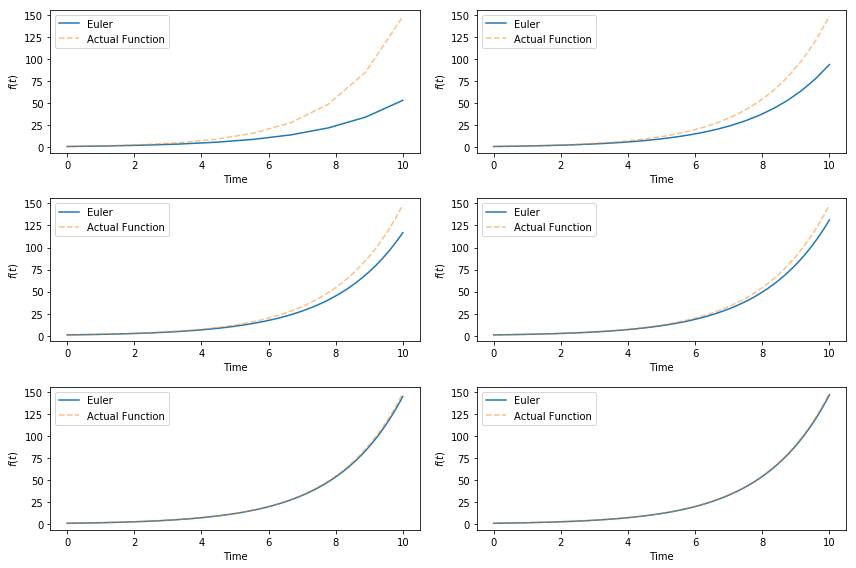

In [14]:
fig,ax = plt.subplots(3,2,figsize=[12,8])
ax = ax.ravel()
precision = [10,25,50,100,500,1000]
for plot,prec in zip(ax,precision):
    t = np.linspace(0,10,prec)
    plot.plot(t,euler(x0,t,lin_diff), alpha=1, label="Euler")
    plot.plot(t,np.exp(lin_diff(t)), alpha=0.5, linestyle="dashed",label="Actual Function")
    plot.set_xlabel("Time")
    plot.set_ylabel("$f(t)$")
    plot.legend()
plt.tight_layout()
plt.show()

## The Lotka–Volterra equations
Also known as the predator–prey equations, are a pair of first-order nonlinear differential equations, frequently used to describe the dynamics of biological systems in which two species interact, one as a predator and the other as prey. The populations change through time according to the pair of equations:

The instantaneous growth rates of the two populations are described by following equations:
$$
\displaystyle {\begin{aligned}{\frac {dx}{dt}}&=\alpha x-\beta xy,\\{\frac {dy}{dt}}&=\delta xy-\gamma y,\end{aligned}}
$$
where
- x is the number of preys,
- y is the number of some predators,
- t represents time,
- α, β, γ, δ are constant parameters describing the behavior of the population
  - α is the natural growing rate of preys, when there's no predator
  - β is the natural dying rate of preys, due to predation
  - γ is the natural dying rate of predators, when there's no prey
  - δ is the factor describing growth rate of predator that depends on the number of available preys.

### Exercise 3
Define the function called *lotkavoltera* that will return the growth rates of both species

In [163]:
def lotkavoltera(x,t=0, alpha=1, beta=0.1, gamma=1.5, delta=0.75):
    """ Return an array with the growth rate of prey and predator populations. """
    prey = x[0]
    predator = x[1]
    dprey = alpha * prey - beta * predator * prey
    dpredator = gamma * predator * prey - delta * predator
    return np.array([dprey, dpredator])

### Exercise 4
Find the population size after given period of time. In other words, integrate the systemn over the time. To solve the system we can use one of many build i-in solvers of the SciPy library. The recommended one for easy solutions is ```odeint```. Import the library and investigate the definition of the ```scipy.integrate.odeint??```

Import the scipy.integrate module

In [ ]:
import scipy.integrate

Define the time vector for the integration

In [133]:
t=np.linspace(0,60,1000) 

Define the initial conditions and parameters space

In [134]:
y0 = np.array([10., 5])
args = (1., 0.1, 1.5, 0.75)

Run the simulations and store the results in ```Y``` object

In [135]:
Y = scipy.integrate.odeint(lotkavoltera, y0, t, args)

Plot the solutions over the time. Remember that the good graph need axis labels and a legend 

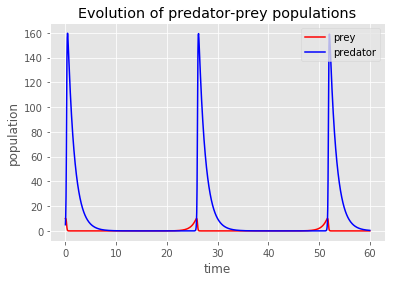

In [136]:
plt.plot(t, Y.T[0], 'r-', label='prey')
plt.plot(t, Y.T[1]  , 'b-', label='predator')
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('population')
plt.title('Evolution of predator-prey populations')

### Exercise 5
For certain parameters you can find that the populations oscillate. Find a set of such parameters and display the results graphically.

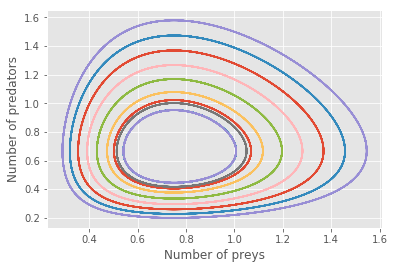

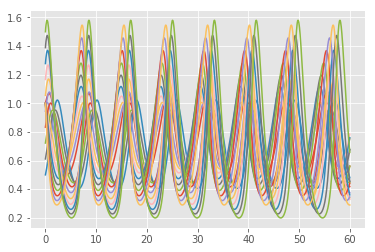

In [276]:
 for x0 in np.linspace(0.5,1.5,10):
    Y=odeint(lotkavoltera,np.array([1.,x0]),T,args=(2./3.,1.,4./3.,1.))
    plt.figure(1)
    plt.plot(Y[:,0],Y[:,1])
    plt.xlabel('Number of preys')
    plt.ylabel('Number of predators')
    plt.figure(2)
    plt.plot(T,Y)

### Exercise 6
Investigate the stationary states of the system, defined by $\dot x = 0$. This system has **2** equilibria: when both species are dead and when predators and preys coexist in a non-trivial equilibrium. Define the equilibrium point, plot the trajectories and direction fields for the system. Before starting find out if there is a plotting function prepared to plot a 2-D field of arrows that you can use.

Define equilibrium point

In [164]:
EQ = ([gamma/delta, alpha/beta])

#### Plot trajectories by looping through the possible values

Plot 10 trajectories where the initial values will range from 1 to 10

In [ ]:
values = np.linspace(0.1, 5, 10)

For clarity, while plotting each trajectory, use a different colour. You can use for that the ```vcolors``` defined below

In [167]:
vcolors = plt.cm.autumn_r(np.linspace(0.1, 1, len(values)))

Create a figure. You will need the limits of the x and y-axis of the trajectory graph to define the grid to compute the direction at each point and plot the direction fields.

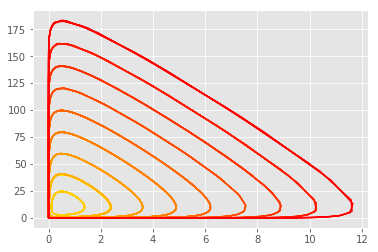

In [253]:
fig = plt.figure()

for v, col in zip(values, vcolors):
    # Starting point of each trajectory
    P0 = [E*v for E in EQ]
    # Integrate system of ODEs to get x and y values
    P = integrate.odeint(lotkavoltera, P0, t)
    # Plot each trajectory
    plt.plot( P[:,0], P[:,1], color=col,
            # Assign starting point to trajectory label
            label='P0=(%.f, %.f)' % ( P0[0], P0[1]) )


Define the grid to compute the direction at each point and plot the direction fields. Use the ```meshgrid``` function.
Set the limits of the phase plot by getting the limits of trajectory plot and define number of points for x and y ranges.

In [284]:
ax1 = fig.gca()
ymax = ax1.get_ylim()[1]
xmax = ax1.get_xlim()[1]

nb_points = 20

x = np.linspace(0, xmax, nb_points)
y = np.linspace(0, ymax, nb_points)

Create meshgrid

In [285]:
X1 , Y1 = np.meshgrid(x,y)

Calculate growth rate at each grid point

In [286]:
DX1, DY1 = lotkavoltera([X1, Y1])

Direction at each grid point is the hypotenuse of the prey direction and the predator direction.

In [287]:
M = (np.hypot(DX1, DY1))

Using the quiver function, plot the field of arrows using DX1 and DY1 for direction and M for speed. Remember about labels, title and legend.

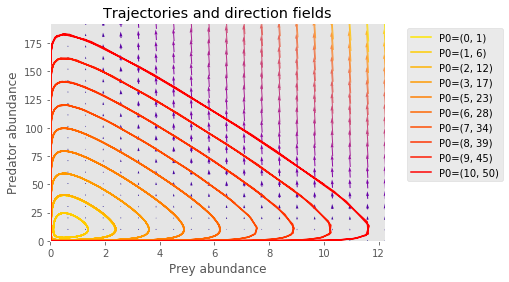

In [288]:
function(lotkavoltera, EQ, values)
ymax = plt.ylim(ymin=0)[1]
xmax = plt.xlim(xmin=0)[1]
X1 , Y1 = np.meshgrid(x,y)
DX1, DY1 = lotkavoltera([X1, Y1])
Q = plt.quiver(X1, Y1, DX1, DY1, M, pivot='mid', cmap=plt.cm.plasma)
plt.xlabel('Prey abundance')
plt.ylabel('Predator abundance')
plt.legend(bbox_to_anchor=(1.05, 1.0))
plt.grid()
plt.xlim(0, xmax)
plt.ylim(0, ymax)
plt.title('Trajectories and direction fields')

### Exercise 7
Find how the parameter combination affects the system. Can we produce limit cycles in our system? i.e. reduce the available resources to the prey, and see how the trajectories look like.

## Analysis of the modified Verhulst equation
The modified Verhulst equation reads
$$\begin{equation}
\dot x = rx(\frac{g}{r}\frac{x}{x+c}-\frac{d}{r}-\frac{x}{K})
\end{equation}$$
Here, 
-g is the growth rate constant, 
- d the death rate constant,
- r = g − d,
- K denotes the capacity of the environment,
- c is a parameter governing the population behaviour at low densities.

### Home work
- Integrate the system over a given period of time (t=1000), 
- find stationary states, 
- plot the phase plot, 
- look how parameters affect the solution.